## <b><span style='color:#F1C40F'>|</span> Імпорт бібліотек та завантаження [даних](https://www.kaggle.com/datasets/osuolaleemmanuel/ad-ab-testing/data)</b>

In [1]:
import pandas as pd
df = pd.read_csv("AdSmartABdata - AdSmartABdata.csv")
df

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


## <b><span style='color:#F1C40F'>|</span> Аналіз даних</b>

In [2]:
df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [4]:
df.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

## <b><span style='color:#F1C40F'>|</span> Аналіз розподілу груп:</b>

C:\Users\sviat\AppData\Local\Temp\ipykernel_13764\801826054.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='experiment', data=df, palette=["#FF6347", "#4682B4"])


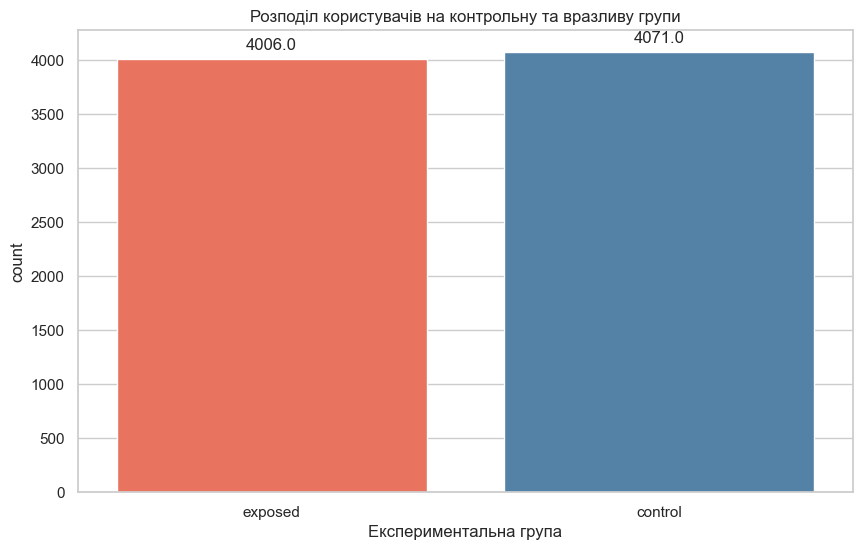

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='experiment', data=df, palette=["#FF6347", "#4682B4"])
plt.title('Розподіл користувачів на контрольну та вразливу групи')
plt.xlabel('Експериментальна група')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.show()

## <b><span style='color:#F1C40F'>|</span> Аналіз розподілу по годинах:</b>

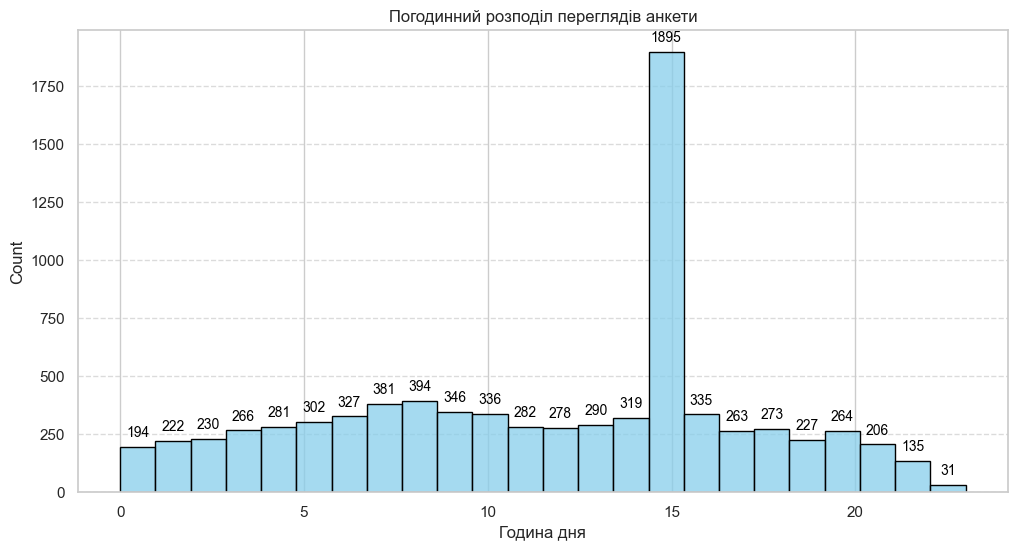

In [6]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(df['hour'], bins=24, kde=False, color='skyblue', edgecolor='black')

plt.title('Погодинний розподіл переглядів анкети')
plt.xlabel('Година дня')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')
plt.show()

## <b><span style='color:#F1C40F'>|</span> Порівняння годинного розподілу між групами:</b>

C:\Users\sviat\AppData\Local\Temp\ipykernel_13764\2128283497.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='experiment', y='hour', data=df, palette="viridis")


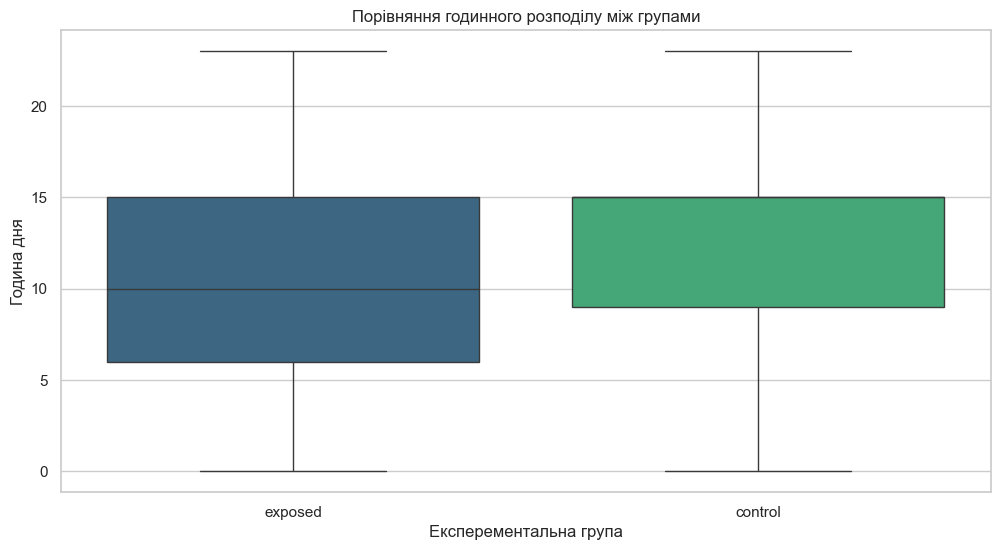

In [7]:
plt.figure(figsize=(12, 6))

ax = sns.boxplot(x='experiment', y='hour', data=df, palette="viridis")

for box, mean in zip(ax.artists):
    box.set_facecolor('white')
    box.set_edgecolor('black')
    box.set_linewidth(2)

plt.title('Порівняння годинного розподілу між групами')
plt.xlabel('Експерементальна група')
plt.ylabel('Година дня')
plt.show()

## <b><span style='color:#F1C40F'>|</span> Аналіз браузерів:</b>

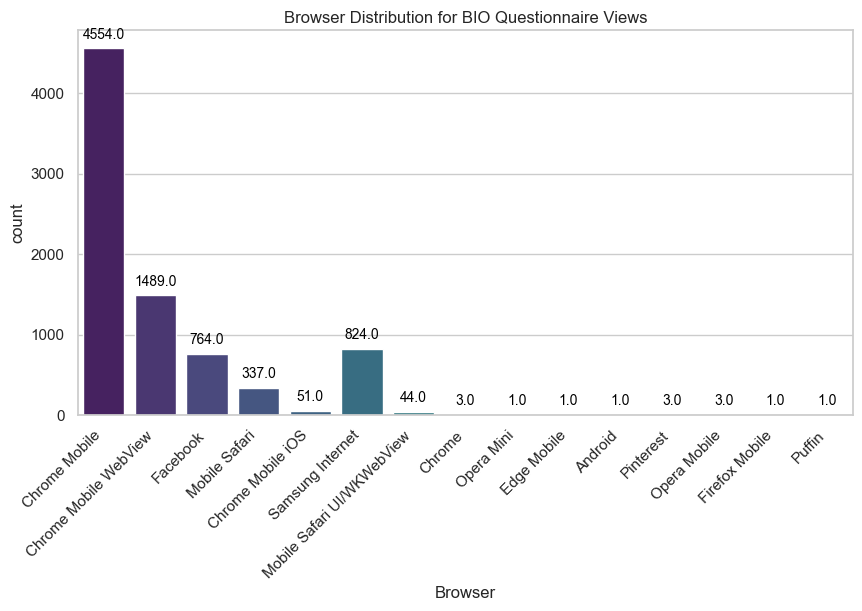

In [8]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='browser', data=df, hue='browser', palette="viridis", legend=False)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

plt.title('Browser Distribution for BIO Questionnaire Views')
plt.xlabel('Browser')
plt.xticks(rotation=45, ha='right')
plt.show()

## <b><span style='color:#F1C40F'>|</span> Порівняння результатів за датами:</b>

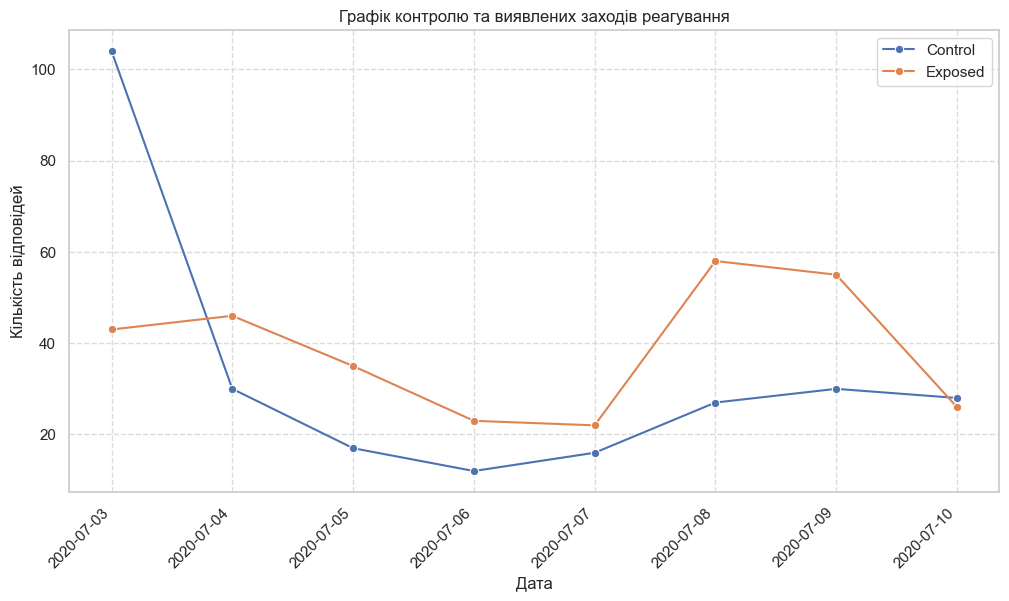

In [9]:
control_data = df[df['experiment'] == 'control']
exposed_data = df[df['experiment'] == 'exposed']

# Count responses for each date
control_counts = control_data.groupby('date').sum()['yes']
exposed_counts = exposed_data.groupby('date').sum()['yes']

plt.figure(figsize=(12, 6))
sns.lineplot(x=control_counts.index, y=control_counts.values, label='Control', marker='o')
sns.lineplot(x=exposed_counts.index, y=exposed_counts.values, label='Exposed', marker='o')
plt.title('Графік контролю та виявлених заходів реагування')
plt.xlabel('Дата')
plt.ylabel('Кількість відповідей')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.show()

## <b><span style='color:#F1C40F'>|</span> Побудова наївного Баєсівського класифікатора</b>

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['experiment'] = label_encoder.fit_transform(df['experiment'])
df['device_make'] = label_encoder.fit_transform(df['device_make'])
df['browser'] = label_encoder.fit_transform(df['browser'])

# Створення цільової змінної (y) та ознак (X)
df['response'] = df['yes'] > 0  # Якщо є відповідь "так"
X = df[['experiment', 'hour', 'device_make', 'platform_os', 'browser']]
y = df['response']

print("X:\n", X[:5])
print("\ny:\n", y[:5])

X:
    experiment  hour  device_make  platform_os  browser
0           1     8           46            6        2
1           1    10           46            6        2
2           1     2           29            6        3
3           0    15          136            6        6
4           0    15           46            6        2

y:
 0    False
1    False
2    False
3    False
4    False
Name: response, dtype: bool


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Навчання моделі
model = GaussianNB()
model.fit(X_train, y_train)

# Прогнозування
y_pred = model.predict(X_test)

# Оцінка точності
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.93
              precision    recall  f1-score   support

       False       0.93      1.00      0.96      1505
        True       0.00      0.00      0.00       111

    accuracy                           0.93      1616
   macro avg       0.47      0.50      0.48      1616
weighted avg       0.87      0.93      0.90      1616



c:\Users\sviat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sviat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sviat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [13]:
# Апостеріорні ймовірності для тестових даних
posterior_probs = model.predict_proba(X_test)

# Перевіримо перші кілька апостеріорних ймовірностей
print(posterior_probs[:10])

[[0.84130768 0.15869232]
 [0.84333223 0.15666777]
 [0.82548847 0.17451153]
 [0.84478205 0.15521795]
 [0.89053465 0.10946535]
 [0.85983029 0.14016971]
 [0.83474048 0.16525952]
 [0.84905166 0.15094834]
 [0.80222151 0.19777849]
 [0.84350101 0.15649899]]


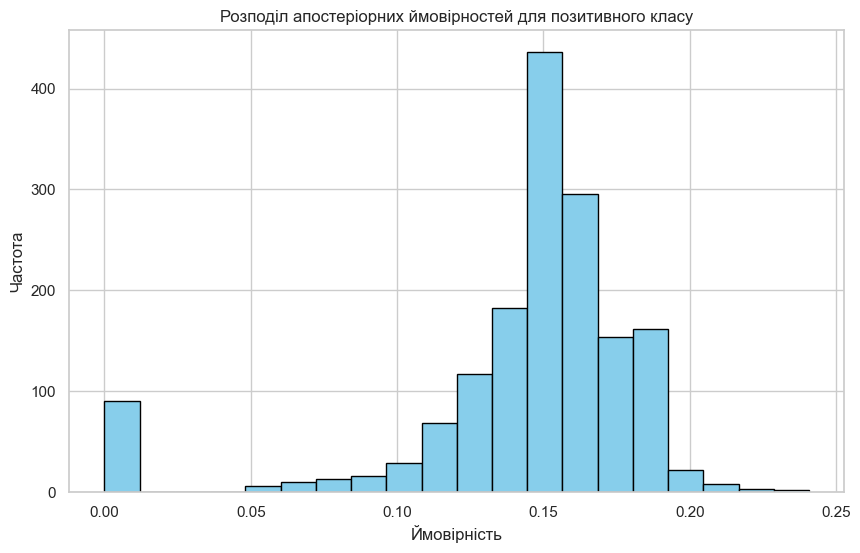

In [14]:
import numpy as np

plt.figure(figsize=(10, 6))
plt.hist(posterior_probs[:, 1], bins=20, color='skyblue', edgecolor='black')
plt.title('Розподіл апостеріорних ймовірностей для позитивного класу')
plt.xlabel('Ймовірність')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

c:\Users\sviat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\sviat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\sviat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\sviat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\sviat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with f

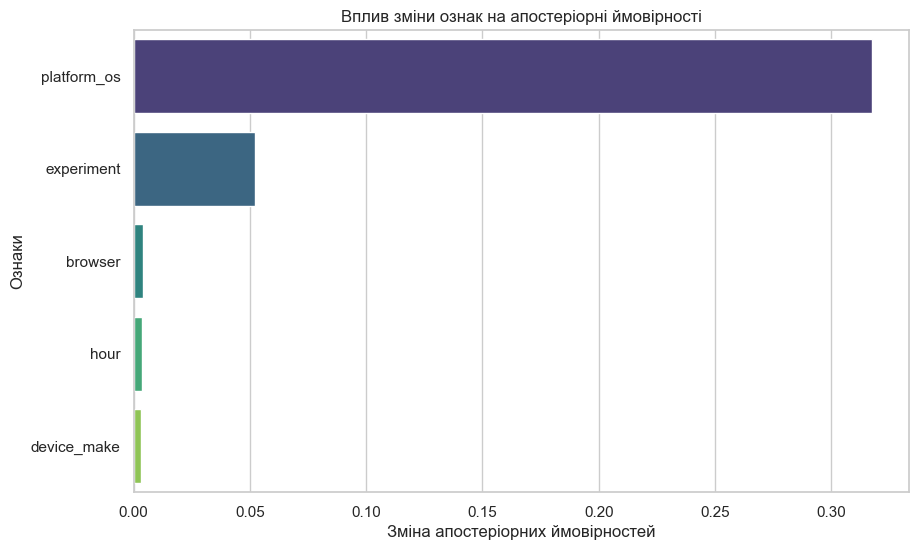

In [15]:
# Аналіз впливу кожної ознаки
feature_changes = {}

# Коректна зміна дискретних змінних
for feature in X.columns:
    sample = X_test.iloc[0].copy()
    modified_sample = sample.copy()

    if feature in ['experiment', 'device_make', 'browser', 'platform_os']:
        unique_values = X[feature].unique()
        current_value = sample[feature]
        new_value = unique_values[unique_values != current_value][0]  # Вибір іншого значення
        modified_sample[feature] = new_value
    else:
        modified_sample[feature] += 1  # Для неперервних змінних

    # Перерахунок ймовірностей
    new_probs = model.predict_proba([modified_sample])[0]
    feature_changes[feature] = np.abs(new_probs - posterior_probs[0]).sum()

# Візуалізація впливу ознак
feature_importance = pd.DataFrame(list(feature_changes.items()), columns=['Feature', 'Impact']).sort_values(by='Impact', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Impact', y='Feature', data=feature_importance, palette='viridis')
plt.title('Вплив зміни ознак на апостеріорні ймовірності')
plt.xlabel('Зміна апостеріорних ймовірностей')
plt.ylabel('Ознаки')
plt.show()